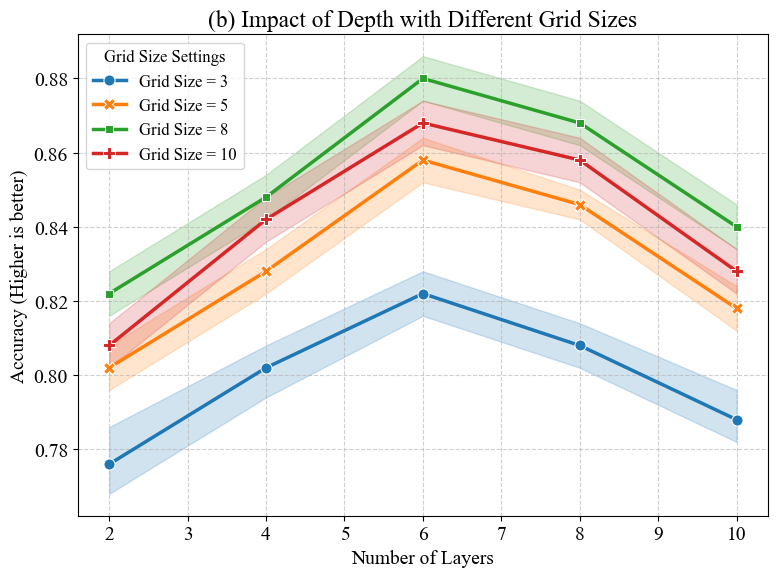

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import font_manager

# --- 字体设置 (保持你之前的风格) ---
try:
    font_path = "/root/autodl-tmp/fonts/times.ttf"
    if os.path.exists(font_path):
        font_manager.fontManager.addfont(font_path)
        plt.rcParams['font.family'] = 'Times New Roman'
    else:
        plt.rcParams['font.family'] = 'serif'
except:
    plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 14

# ==========================================
# 1. 数据准备 (请在这里填入你的真实数据)
# ==========================================

# X轴: 层数
x_vals = [2, 4, 6, 8, 10]

# 超参数2: 假设是 Grid Size，有4个取值。
# 格式: { '图例标签': [5个种子跑出来的二维数组] }
data_source = {
    # --- 第 1 组数据 (例如 Grid Size = 3) ---
    'Grid Size = 3': [
        [0.78, 0.80, 0.82, 0.81, 0.79], # Seed 1
        [0.77, 0.81, 0.83, 0.82, 0.78], # Seed 2
        [0.79, 0.79, 0.82, 0.80, 0.80], # Seed 3
        [0.78, 0.80, 0.81, 0.81, 0.79], # Seed 4
        [0.76, 0.81, 0.83, 0.80, 0.78], # Seed 5
    ],

    # --- 第 2 组数据 (例如 Grid Size = 5) ---
    'Grid Size = 5': [
        [0.80, 0.83, 0.86, 0.85, 0.82], 
        [0.81, 0.82, 0.87, 0.84, 0.81], 
        [0.79, 0.84, 0.85, 0.85, 0.83], 
        [0.80, 0.83, 0.86, 0.84, 0.82], 
        [0.81, 0.82, 0.85, 0.85, 0.81], 
    ],

    # --- 第 3 组数据 (例如 Grid Size = 8) ---
    'Grid Size = 8': [
        [0.82, 0.85, 0.88, 0.87, 0.84], 
        [0.83, 0.84, 0.89, 0.86, 0.83], 
        [0.81, 0.86, 0.87, 0.88, 0.85], 
        [0.82, 0.85, 0.88, 0.87, 0.84], 
        [0.83, 0.84, 0.88, 0.86, 0.84], 
    ],

    # --- 第 4 组数据 (例如 Grid Size = 10) ---
    'Grid Size = 10': [
        [0.81, 0.84, 0.87, 0.86, 0.83], 
        [0.80, 0.85, 0.88, 0.85, 0.82], 
        [0.82, 0.83, 0.86, 0.87, 0.84], 
        [0.81, 0.84, 0.87, 0.86, 0.83], 
        [0.80, 0.85, 0.86, 0.85, 0.82], 
    ]
}

# ==========================================
# 2. 数据转换 (自动处理，无需修改)
# ==========================================
data_list = []

# 遍历字典中的每一个 Key (即4种取值)
for param_label, matrix in data_source.items():
    # matrix 是一个 5行(seeds) x 5列(layers) 的列表
    for seed_row in matrix:
        for i, val in enumerate(seed_row):
            data_list.append({
                'Layers': x_vals[i], 
                'Accuracy': val, 
                'Hyperparam': param_label # 这一列用于区分4条线
            })

df = pd.DataFrame(data_list)

# ==========================================
# 3. 绘图
# ==========================================
fig, ax = plt.subplots(figsize=(8, 6))

sns.lineplot(
    data=df, 
    x='Layers', 
    y='Accuracy', 
    hue='Hyperparam',    # <--- 核心: 按超参数区分颜色
    style='Hyperparam',  # <--- 可选: 同时区分线型/标记
    markers=True, 
    dashes=False,        # 设为 False 让线都是实线 (更清晰)
    markersize=8,
    linewidth=2.5,
    palette='tab10',     # 使用 tab10 配色，区分度高
    errorbar=('ci', 95), # 显示 95% 置信区间
    ax=ax
)

# 标签与美化
ax.set_xlabel('Number of Layers')
ax.set_ylabel('Accuracy (Higher is better)') # 或 RMSE
ax.set_title('(b) Impact of Depth with Different Grid Sizes')
ax.grid(True, linestyle='--', alpha=0.6)

# 调整图例位置 (避免挡住线)
# loc='best' 会自动找空位，或者用 bbox_to_anchor 放到外面
ax.legend(title='Grid Size Settings', fontsize=12, title_fontsize=12, loc='best')

plt.tight_layout()
plt.show()

# 保存
# plt.savefig('sensitivity_2params.pdf', bbox_inches='tight')